In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import os
import csv

In [2]:
# File to Load (Remember to Change These if my path is different)
intakes24_data_load = "Data/Austin_Animal_Center_Intakes02_24.csv"
outcomes24_data_load = "Data/Austin_Animal_Center_Outcomes02_24.csv"

intakes24_data = pd.read_csv(intakes24_data_load)
outcomes24_data = pd.read_csv(outcomes24_data_load)

In [3]:
outcomes24_data["Animal ID"].astype(str)
intakes24_data["Animal ID"].astype(str)

0         A829428
1         A829850
2         A829849
3         A829847
4         A829832
           ...   
123969    A664233
123970    A664237
123971    A664235
123972    A664236
123973    A521520
Name: Animal ID, Length: 123974, dtype: object

In [4]:
outcomes24_data["Animal ID"] = outcomes24_data["Animal ID"].map(lambda x: str(x)[1:])
intakes24_data["Animal ID"] = intakes24_data["Animal ID"].map(lambda x: str(x)[1:])

In [5]:
outcomes24_data = outcomes24_data.drop(columns=['Name', 'MonthYear', 'Animal Type','Breed','Color'])
intakes24_data = intakes24_data.drop(columns=['MonthYear'])

In [6]:
outcomes24_data = outcomes24_data.sort_values(by=["Animal ID", "DateTime"], ascending=False)
intakes24_data = intakes24_data.sort_values(by=["Animal ID", "DateTime"], ascending=False)

In [7]:
outcomes24_data = outcomes24_data.drop_duplicates(["Animal ID"], keep= 'first')
intakes24_data = intakes24_data.drop_duplicates(["Animal ID"], keep= 'first')

In [8]:
outcomes24_data.rename(columns = {'DateTime':'DateTime_out'}, inplace = True)

In [9]:
# Combine the data into a single dataset.  
allanimal24_data = pd.merge(intakes24_data,outcomes24_data, how='left', on=["Animal ID","Animal ID"])
allanimal24_data.head()

,Animal ID,Name,DateTime,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color,DateTime_out,Date of Birth,Outcome Type,Outcome Subtype,Sex upon Outcome,Age upon Outcome
0,829850,NaN,2/24/2021 15:43,7605 Cayenne Lane in Austin (TX),Stray,Normal,Cat,Unknown,2 weeks,Domestic Shorthair,Black/Black,2/24/2021 17:31,2/9/2021,Transfer,Partner,Unknown,2 weeks
1,829849,NaN,2/24/2021 15:25,400 West St Elmo Road in Austin (TX),Stray,Sick,Cat,Intact Female,2 years,Domestic Shorthair,Black,NaN,NaN,NaN,NaN,NaN,NaN
2,829847,Kitty Kitty Catahoula,2/24/2021 15:03,8552 N Lamar in Austin (TX),Owner Surrender,Normal,Cat,Intact Female,3 months,Siamese,Seal Point,NaN,NaN,NaN,NaN,NaN,NaN
3,829840,NaN,2/24/2021 14:10,10406 Loring Dr in Austin (TX),Stray,Sick,Cat,Intact Male,8 years,Domestic Shorthair,Black,NaN,NaN,NaN,NaN,NaN,NaN
4,829837,NaN,2/24/2021 13:58,1020 Bird Creek Dr in Austin (TX),Stray,Normal,Dog,Intact Male,3 months,Labrador Retriever Mix,Brown/White,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
allanimal24_data["DateTime"]= pd.to_datetime(allanimal24_data["DateTime"])

In [11]:
allanimal24_data["DateTime_out"]= pd.to_datetime(allanimal24_data["DateTime_out"])

In [12]:
allanimal24_data["shelter_time"] = allanimal24_data["DateTime_out"] - allanimal24_data["DateTime"]

In [13]:
allanimal24_data.loc[allanimal24_data['shelter_time'] > pd.Timedelta(0)]

,Animal ID,Name,DateTime,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color,DateTime_out,Date of Birth,Outcome Type,Outcome Subtype,Sex upon Outcome,Age upon Outcome,shelter_time
0,829850,NaN,2021-02-24 15:43:00,7605 Cayenne Lane in Austin (TX),Stray,Normal,Cat,Unknown,2 weeks,Domestic Shorthair,Black/Black,2021-02-24 17:31:00,2/9/2021,Transfer,Partner,Unknown,2 weeks,0 days 01:48:00
7,829826,NaN,2021-02-24 09:21:00,Austin (TX),Wildlife,Normal,Other,Unknown,2 years,Bat,Brown,2021-02-24 15:36:00,2/24/2019,Euthanasia,Rabies Risk,Unknown,NaN,0 days 06:15:00
18,829792,Rocky,2021-02-23 10:32:00,Travis (TX),Owner Surrender,Sick,Dog,Intact Male,3 months,Pomeranian,Brown,2021-02-23 12:30:00,11/23/2020,Transfer,Partner,Intact Male,3 months,0 days 01:58:00
20,829788,Ranger,2021-02-23 07:29:00,4434 Frontier Trail in Austin (TX),Owner Surrender,Injured,Dog,Neutered Male,8 years,Alaskan Malamute,Black/White,2021-02-23 14:41:00,2/23/2013,Transfer,Partner,Neutered Male,8 years,0 days 07:12:00
25,829782,NaN,2021-02-22 21:46:00,1215 East Slaughter Lane in Austin (TX),Wildlife,Normal,Other,Unknown,1 year,Bat,Brown,2021-02-23 08:01:00,2/22/2020,Euthanasia,Rabies Risk,Unknown,1 year,0 days 10:15:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110788,163459,Sasha,2014-11-14 15:11:00,Ih 35 And 41St St in Austin (TX),Stray,Normal,Dog,Intact Female,15 years,Miniature Schnauzer Mix,Black/Gray,2014-11-14 19:28:00,10/19/1999,Return to Owner,NaN,Intact Female,15 years,0 days 04:17:00
110789,141142,Bettie,2013-11-16 14:46:00,Austin (TX),Stray,Aged,Dog,Spayed Female,15 years,Labrador Retriever/Pit Bull,Black/White,2013-11-17 11:40:00,6/1/1998,Return to Owner,NaN,Spayed Female,15 years,0 days 20:54:00
110790,134067,Bandit,2013-11-16 09:02:00,12034 Research Blvd in Austin (TX),Public Assist,Injured,Dog,Neutered Male,16 years,Shetland Sheepdog,Brown/White,2013-11-16 11:54:00,10/16/1997,Return to Owner,NaN,Neutered Male,16 years,0 days 02:52:00
110791,047759,Oreo,2014-04-02 15:55:00,Austin (TX),Owner Surrender,Normal,Dog,Neutered Male,10 years,Dachshund,Tricolor,2014-04-07 15:12:00,4/2/2004,Transfer,Partner,Neutered Male,10 years,4 days 23:17:00


In [14]:
allanimal24_data["shelter_time"] = allanimal24_data["shelter_time"].astype(str)

In [15]:
allanimal24_data.dtypes

Animal ID                   object
Name                        object
DateTime            datetime64[ns]
Found Location              object
Intake Type                 object
Intake Condition            object
Animal Type                 object
Sex upon Intake             object
Age upon Intake             object
Breed                       object
Color                       object
DateTime_out        datetime64[ns]
Date of Birth               object
Outcome Type                object
Outcome Subtype             object
Sex upon Outcome            object
Age upon Outcome            object
shelter_time                object
dtype: object

In [16]:
allanimal24_data["shelter_days"] = allanimal24_data["shelter_time"].str[:2]
allanimal24_data

,Animal ID,Name,DateTime,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color,DateTime_out,Date of Birth,Outcome Type,Outcome Subtype,Sex upon Outcome,Age upon Outcome,shelter_time,shelter_days
0,829850,NaN,2021-02-24 15:43:00,7605 Cayenne Lane in Austin (TX),Stray,Normal,Cat,Unknown,2 weeks,Domestic Shorthair,Black/Black,2021-02-24 17:31:00,2/9/2021,Transfer,Partner,Unknown,2 weeks,0 days 01:48:00,0
1,829849,NaN,2021-02-24 15:25:00,400 West St Elmo Road in Austin (TX),Stray,Sick,Cat,Intact Female,2 years,Domestic Shorthair,Black,NaT,NaN,NaN,NaN,NaN,NaN,NaT,Na
2,829847,Kitty Kitty Catahoula,2021-02-24 15:03:00,8552 N Lamar in Austin (TX),Owner Surrender,Normal,Cat,Intact Female,3 months,Siamese,Seal Point,NaT,NaN,NaN,NaN,NaN,NaN,NaT,Na
3,829840,NaN,2021-02-24 14:10:00,10406 Loring Dr in Austin (TX),Stray,Sick,Cat,Intact Male,8 years,Domestic Shorthair,Black,NaT,NaN,NaN,NaN,NaN,NaN,NaT,Na
4,829837,NaN,2021-02-24 13:58:00,1020 Bird Creek Dr in Austin (TX),Stray,Normal,Dog,Intact Male,3 months,Labrador Retriever Mix,Brown/White,NaT,NaN,NaN,NaN,NaN,NaN,NaT,Na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110788,163459,Sasha,2014-11-14 15:11:00,Ih 35 And 41St St in Austin (TX),Stray,Normal,Dog,Intact Female,15 years,Miniature Schnauzer Mix,Black/Gray,2014-11-14 19:28:00,10/19/1999,Return to Owner,NaN,Intact Female,15 years,0 days 04:17:00,0
110789,141142,Bettie,2013-11-16 14:46:00,Austin (TX),Stray,Aged,Dog,Spayed Female,15 years,Labrador Retriever/Pit Bull,Black/White,2013-11-17 11:40:00,6/1/1998,Return to Owner,NaN,Spayed Female,15 years,0 days 20:54:00,0
110790,134067,Bandit,2013-11-16 09:02:00,12034 Research Blvd in Austin (TX),Public Assist,Injured,Dog,Neutered Male,16 years,Shetland Sheepdog,Brown/White,2013-11-16 11:54:00,10/16/1997,Return to Owner,NaN,Neutered Male,16 years,0 days 02:52:00,0
110791,047759,Oreo,2014-04-02 15:55:00,Austin (TX),Owner Surrender,Normal,Dog,Neutered Male,10 years,Dachshund,Tricolor,2014-04-07 15:12:00,4/2/2004,Transfer,Partner,Neutered Male,10 years,4 days 23:17:00,4


In [17]:
allanimal24_data["shelter_days"] = allanimal24_data["shelter_days"].replace("Na", 0.1)
allanimal24_data

,Animal ID,Name,DateTime,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color,DateTime_out,Date of Birth,Outcome Type,Outcome Subtype,Sex upon Outcome,Age upon Outcome,shelter_time,shelter_days
0,829850,NaN,2021-02-24 15:43:00,7605 Cayenne Lane in Austin (TX),Stray,Normal,Cat,Unknown,2 weeks,Domestic Shorthair,Black/Black,2021-02-24 17:31:00,2/9/2021,Transfer,Partner,Unknown,2 weeks,0 days 01:48:00,0
1,829849,NaN,2021-02-24 15:25:00,400 West St Elmo Road in Austin (TX),Stray,Sick,Cat,Intact Female,2 years,Domestic Shorthair,Black,NaT,NaN,NaN,NaN,NaN,NaN,NaT,0.1
2,829847,Kitty Kitty Catahoula,2021-02-24 15:03:00,8552 N Lamar in Austin (TX),Owner Surrender,Normal,Cat,Intact Female,3 months,Siamese,Seal Point,NaT,NaN,NaN,NaN,NaN,NaN,NaT,0.1
3,829840,NaN,2021-02-24 14:10:00,10406 Loring Dr in Austin (TX),Stray,Sick,Cat,Intact Male,8 years,Domestic Shorthair,Black,NaT,NaN,NaN,NaN,NaN,NaN,NaT,0.1
4,829837,NaN,2021-02-24 13:58:00,1020 Bird Creek Dr in Austin (TX),Stray,Normal,Dog,Intact Male,3 months,Labrador Retriever Mix,Brown/White,NaT,NaN,NaN,NaN,NaN,NaN,NaT,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110788,163459,Sasha,2014-11-14 15:11:00,Ih 35 And 41St St in Austin (TX),Stray,Normal,Dog,Intact Female,15 years,Miniature Schnauzer Mix,Black/Gray,2014-11-14 19:28:00,10/19/1999,Return to Owner,NaN,Intact Female,15 years,0 days 04:17:00,0
110789,141142,Bettie,2013-11-16 14:46:00,Austin (TX),Stray,Aged,Dog,Spayed Female,15 years,Labrador Retriever/Pit Bull,Black/White,2013-11-17 11:40:00,6/1/1998,Return to Owner,NaN,Spayed Female,15 years,0 days 20:54:00,0
110790,134067,Bandit,2013-11-16 09:02:00,12034 Research Blvd in Austin (TX),Public Assist,Injured,Dog,Neutered Male,16 years,Shetland Sheepdog,Brown/White,2013-11-16 11:54:00,10/16/1997,Return to Owner,NaN,Neutered Male,16 years,0 days 02:52:00,0
110791,047759,Oreo,2014-04-02 15:55:00,Austin (TX),Owner Surrender,Normal,Dog,Neutered Male,10 years,Dachshund,Tricolor,2014-04-07 15:12:00,4/2/2004,Transfer,Partner,Neutered Male,10 years,4 days 23:17:00,4


In [18]:
allanimal24_data["shelter_days"] = allanimal24_data["shelter_days"].astype(int)

In [20]:
allanimal24_data.loc[allanimal24_data["shelter_days"].isin(range(0,1)), "Adopt Rating"] = "AA"
allanimal24_data.loc[allanimal24_data["shelter_days"].isin(range(2,5)), "Adopt Rating"] = "A"
allanimal24_data.loc[allanimal24_data["shelter_days"].isin(range(6,14)), "Adopt Rating"] = "B"
allanimal24_data.loc[allanimal24_data["shelter_days"].isin(range(15,30)), "Adopt Rating"] = "C"
allanimal24_data.loc[allanimal24_data["shelter_days"].isin(range(31,90)), "Adopt Rating"] = "D"
allanimal24_data.loc[allanimal24_data["shelter_days"].isin(range(91,1000)), "Adopt Rating"] = "F"
allanimal24_data

,Animal ID,Name,DateTime,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color,DateTime_out,Date of Birth,Outcome Type,Outcome Subtype,Sex upon Outcome,Age upon Outcome,shelter_time,shelter_days,Adopt Rating
0,829850,NaN,2021-02-24 15:43:00,7605 Cayenne Lane in Austin (TX),Stray,Normal,Cat,Unknown,2 weeks,Domestic Shorthair,Black/Black,2021-02-24 17:31:00,2/9/2021,Transfer,Partner,Unknown,2 weeks,0 days 01:48:00,0,AA
1,829849,NaN,2021-02-24 15:25:00,400 West St Elmo Road in Austin (TX),Stray,Sick,Cat,Intact Female,2 years,Domestic Shorthair,Black,NaT,NaN,NaN,NaN,NaN,NaN,NaT,0,AA
2,829847,Kitty Kitty Catahoula,2021-02-24 15:03:00,8552 N Lamar in Austin (TX),Owner Surrender,Normal,Cat,Intact Female,3 months,Siamese,Seal Point,NaT,NaN,NaN,NaN,NaN,NaN,NaT,0,AA
3,829840,NaN,2021-02-24 14:10:00,10406 Loring Dr in Austin (TX),Stray,Sick,Cat,Intact Male,8 years,Domestic Shorthair,Black,NaT,NaN,NaN,NaN,NaN,NaN,NaT,0,AA
4,829837,NaN,2021-02-24 13:58:00,1020 Bird Creek Dr in Austin (TX),Stray,Normal,Dog,Intact Male,3 months,Labrador Retriever Mix,Brown/White,NaT,NaN,NaN,NaN,NaN,NaN,NaT,0,AA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110788,163459,Sasha,2014-11-14 15:11:00,Ih 35 And 41St St in Austin (TX),Stray,Normal,Dog,Intact Female,15 years,Miniature Schnauzer Mix,Black/Gray,2014-11-14 19:28:00,10/19/1999,Return to Owner,NaN,Intact Female,15 years,0 days 04:17:00,0,AA
110789,141142,Bettie,2013-11-16 14:46:00,Austin (TX),Stray,Aged,Dog,Spayed Female,15 years,Labrador Retriever/Pit Bull,Black/White,2013-11-17 11:40:00,6/1/1998,Return to Owner,NaN,Spayed Female,15 years,0 days 20:54:00,0,AA
110790,134067,Bandit,2013-11-16 09:02:00,12034 Research Blvd in Austin (TX),Public Assist,Injured,Dog,Neutered Male,16 years,Shetland Sheepdog,Brown/White,2013-11-16 11:54:00,10/16/1997,Return to Owner,NaN,Neutered Male,16 years,0 days 02:52:00,0,AA
110791,047759,Oreo,2014-04-02 15:55:00,Austin (TX),Owner Surrender,Normal,Dog,Neutered Male,10 years,Dachshund,Tricolor,2014-04-07 15:12:00,4/2/2004,Transfer,Partner,Neutered Male,10 years,4 days 23:17:00,4,A


In [21]:
allanimal24_data.loc[allanimal24_data["Outcome Type"]!="Adoption", "Adopt Rating"] = "Not Adopted"
allanimal24_data

,Animal ID,Name,DateTime,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color,DateTime_out,Date of Birth,Outcome Type,Outcome Subtype,Sex upon Outcome,Age upon Outcome,shelter_time,shelter_days,Adopt Rating
0,829850,NaN,2021-02-24 15:43:00,7605 Cayenne Lane in Austin (TX),Stray,Normal,Cat,Unknown,2 weeks,Domestic Shorthair,Black/Black,2021-02-24 17:31:00,2/9/2021,Transfer,Partner,Unknown,2 weeks,0 days 01:48:00,0,Not Adopted
1,829849,NaN,2021-02-24 15:25:00,400 West St Elmo Road in Austin (TX),Stray,Sick,Cat,Intact Female,2 years,Domestic Shorthair,Black,NaT,NaN,NaN,NaN,NaN,NaN,NaT,0,Not Adopted
2,829847,Kitty Kitty Catahoula,2021-02-24 15:03:00,8552 N Lamar in Austin (TX),Owner Surrender,Normal,Cat,Intact Female,3 months,Siamese,Seal Point,NaT,NaN,NaN,NaN,NaN,NaN,NaT,0,Not Adopted
3,829840,NaN,2021-02-24 14:10:00,10406 Loring Dr in Austin (TX),Stray,Sick,Cat,Intact Male,8 years,Domestic Shorthair,Black,NaT,NaN,NaN,NaN,NaN,NaN,NaT,0,Not Adopted
4,829837,NaN,2021-02-24 13:58:00,1020 Bird Creek Dr in Austin (TX),Stray,Normal,Dog,Intact Male,3 months,Labrador Retriever Mix,Brown/White,NaT,NaN,NaN,NaN,NaN,NaN,NaT,0,Not Adopted
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110788,163459,Sasha,2014-11-14 15:11:00,Ih 35 And 41St St in Austin (TX),Stray,Normal,Dog,Intact Female,15 years,Miniature Schnauzer Mix,Black/Gray,2014-11-14 19:28:00,10/19/1999,Return to Owner,NaN,Intact Female,15 years,0 days 04:17:00,0,Not Adopted
110789,141142,Bettie,2013-11-16 14:46:00,Austin (TX),Stray,Aged,Dog,Spayed Female,15 years,Labrador Retriever/Pit Bull,Black/White,2013-11-17 11:40:00,6/1/1998,Return to Owner,NaN,Spayed Female,15 years,0 days 20:54:00,0,Not Adopted
110790,134067,Bandit,2013-11-16 09:02:00,12034 Research Blvd in Austin (TX),Public Assist,Injured,Dog,Neutered Male,16 years,Shetland Sheepdog,Brown/White,2013-11-16 11:54:00,10/16/1997,Return to Owner,NaN,Neutered Male,16 years,0 days 02:52:00,0,Not Adopted
110791,047759,Oreo,2014-04-02 15:55:00,Austin (TX),Owner Surrender,Normal,Dog,Neutered Male,10 years,Dachshund,Tricolor,2014-04-07 15:12:00,4/2/2004,Transfer,Partner,Neutered Male,10 years,4 days 23:17:00,4,Not Adopted


In [22]:
allanimal24_data.loc[allanimal24_data["shelter_time"]=="NaT", "shelter_days"] = "New intake"
allanimal24_data

,Animal ID,Name,DateTime,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color,DateTime_out,Date of Birth,Outcome Type,Outcome Subtype,Sex upon Outcome,Age upon Outcome,shelter_time,shelter_days,Adopt Rating
0,829850,NaN,2021-02-24 15:43:00,7605 Cayenne Lane in Austin (TX),Stray,Normal,Cat,Unknown,2 weeks,Domestic Shorthair,Black/Black,2021-02-24 17:31:00,2/9/2021,Transfer,Partner,Unknown,2 weeks,0 days 01:48:00,0,Not Adopted
1,829849,NaN,2021-02-24 15:25:00,400 West St Elmo Road in Austin (TX),Stray,Sick,Cat,Intact Female,2 years,Domestic Shorthair,Black,NaT,NaN,NaN,NaN,NaN,NaN,NaT,New intake,Not Adopted
2,829847,Kitty Kitty Catahoula,2021-02-24 15:03:00,8552 N Lamar in Austin (TX),Owner Surrender,Normal,Cat,Intact Female,3 months,Siamese,Seal Point,NaT,NaN,NaN,NaN,NaN,NaN,NaT,New intake,Not Adopted
3,829840,NaN,2021-02-24 14:10:00,10406 Loring Dr in Austin (TX),Stray,Sick,Cat,Intact Male,8 years,Domestic Shorthair,Black,NaT,NaN,NaN,NaN,NaN,NaN,NaT,New intake,Not Adopted
4,829837,NaN,2021-02-24 13:58:00,1020 Bird Creek Dr in Austin (TX),Stray,Normal,Dog,Intact Male,3 months,Labrador Retriever Mix,Brown/White,NaT,NaN,NaN,NaN,NaN,NaN,NaT,New intake,Not Adopted
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110788,163459,Sasha,2014-11-14 15:11:00,Ih 35 And 41St St in Austin (TX),Stray,Normal,Dog,Intact Female,15 years,Miniature Schnauzer Mix,Black/Gray,2014-11-14 19:28:00,10/19/1999,Return to Owner,NaN,Intact Female,15 years,0 days 04:17:00,0,Not Adopted
110789,141142,Bettie,2013-11-16 14:46:00,Austin (TX),Stray,Aged,Dog,Spayed Female,15 years,Labrador Retriever/Pit Bull,Black/White,2013-11-17 11:40:00,6/1/1998,Return to Owner,NaN,Spayed Female,15 years,0 days 20:54:00,0,Not Adopted
110790,134067,Bandit,2013-11-16 09:02:00,12034 Research Blvd in Austin (TX),Public Assist,Injured,Dog,Neutered Male,16 years,Shetland Sheepdog,Brown/White,2013-11-16 11:54:00,10/16/1997,Return to Owner,NaN,Neutered Male,16 years,0 days 02:52:00,0,Not Adopted
110791,047759,Oreo,2014-04-02 15:55:00,Austin (TX),Owner Surrender,Normal,Dog,Neutered Male,10 years,Dachshund,Tricolor,2014-04-07 15:12:00,4/2/2004,Transfer,Partner,Neutered Male,10 years,4 days 23:17:00,4,Not Adopted


In [23]:
adoption_speed = allanimal24_data.groupby("Adopt Rating")

Text(0, 0.5, 'Count')

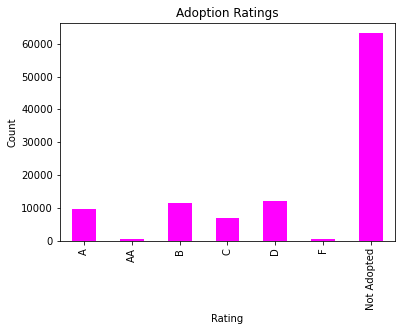

In [24]:
speed_data = adoption_speed["Adopt Rating"].count()

ax1 = speed_data.plot.bar(facecolor='magenta',title="Adoption Ratings")
ax1.set_xlabel("Rating")
ax1.set_ylabel("Count")

In [25]:
allanimal24_data["Outcome Type"] = allanimal24_data["Outcome Type"].replace("NaN", -1)

Text(0, 0.5, 'Count')

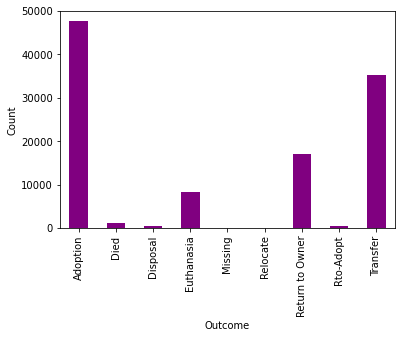

In [26]:
outcome = allanimal24_data.groupby("Outcome Type")
outcome_data = outcome["Outcome Type"].count()

ax1 = outcome_data.plot.bar(facecolor='purple')
ax1.set_xlabel("Outcome")
ax1.set_ylabel("Count")

Text(0, 0.5, 'Count')

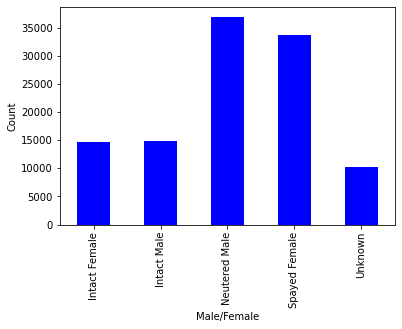

In [27]:
sex = allanimal24_data.groupby("Sex upon Outcome")
sex_data = sex["Sex upon Outcome"].count()

ax1 = sex_data.plot.bar(facecolor='blue')
ax1.set_xlabel("Male/Female")
ax1.set_ylabel("Count")

In [28]:
species_data = allanimal24_data.groupby(["Animal Type","Sex upon Outcome"]).size()
species_info = species_data.count()
species_info

22

<AxesSubplot:xlabel='Animal Type'>

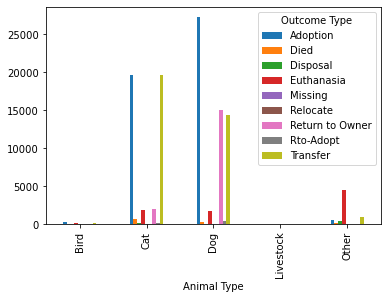

In [29]:
allanimal24_data.groupby(["Animal Type","Outcome Type"]).size().unstack().plot.bar()

<AxesSubplot:xlabel='Animal Type'>

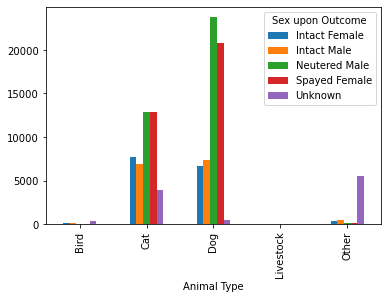

In [30]:
allanimal24_data.groupby(["Animal Type","Sex upon Outcome"]).size().unstack().plot.bar()

<AxesSubplot:xlabel='Animal Type'>

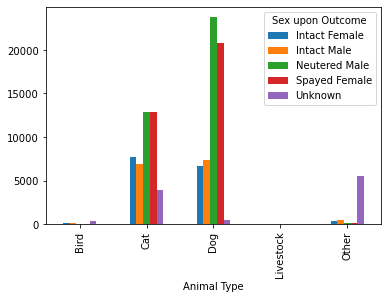

In [31]:
allanimal24_data.groupby(["Animal Type","Sex upon Outcome"]).size().unstack().plot.bar()

<AxesSubplot:xlabel='Outcome Type'>

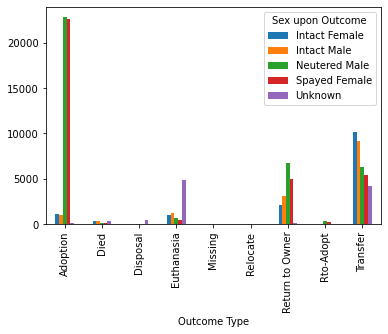

In [32]:
allanimal24_data.groupby(["Outcome Type","Sex upon Outcome"]).size().unstack().plot.bar()

In [33]:
allanimal24_data.loc[allanimal24_data["Breed"].str.contains('domestic shorthair', case=False), "Breed"] = 'Domestic Shorthair'
allanimal24_data.loc[allanimal24_data["Breed"].str.contains('domestic longhair', case=False), "Breed"] = 'Domestic Longhair'
allanimal24_data.loc[allanimal24_data["Breed"].str.contains('domestic medium hair', case=False), "Breed"] = 'Domestic Medium Hair'
allanimal24_data.loc[allanimal24_data["Breed"].str.contains('siamese', case=False), "Breed"] = 'Siamese mix'
allanimal24_data.loc[allanimal24_data["Breed"].str.contains('bengal', case=False), "Breed"] = 'Bengal mix'
allanimal24_data.loc[allanimal24_data["Breed"].str.contains('manx', case=False), "Breed"] = 'Manx mix'
allanimal24_data.loc[allanimal24_data["Breed"].str.contains('Russian Blue', case=False), "Breed"] = 'Russian Blue mix'
allanimal24_data.loc[allanimal24_data["Breed"].str.contains('Maine Coon', case=False), "Breed"] = 'Maine Coon mix'
allanimal24_data.loc[allanimal24_data["Breed"].str.contains('Ragdoll', case=False), "Breed"] = 'Ragdoll mix'
allanimal24_data.loc[allanimal24_data["Breed"].str.contains('Burmese', case=False), "Breed"] = 'Burmese mix'
allanimal24_data.loc[allanimal24_data["Breed"].str.contains('Balinese', case=False), "Breed"] = 'Balinese mix'
allanimal24_data.loc[allanimal24_data["Breed"].str.contains('Snowshoe', case=False), "Breed"] = 'Snowshoe mix'
allanimal24_data.loc[allanimal24_data["Breed"].str.contains('Turkish Angora', case=False), "Breed"] = 'Turkish Angora mix'
allanimal24_data.loc[allanimal24_data["Breed"].str.contains('Japanese Bobtail', case=False), "Breed"] = 'Japanese Bobtail mix'
allanimal24_data.loc[allanimal24_data["Breed"].str.contains('Himalayan', case=False), "Breed"] = 'Himalayan mix'
allanimal24_data.loc[allanimal24_data["Breed"].str.contains('Persian', case=False), "Breed"] = 'Persian mix'
allanimal24_data.loc[allanimal24_data["Breed"].str.contains('Abyssinian', case=False), "Breed"] = 'Abyssinian mix'
allanimal24_data.loc[allanimal24_data["Breed"].str.contains('American Curl Shorthair', case=False), "Breed"] = 'American Curl Shorthair mix'
allanimal24_data.loc[allanimal24_data["Breed"].str.contains('Havana Brown', case=False), "Breed"] = 'Havana Brown mix'
allanimal24_data.loc[allanimal24_data["Breed"].str.contains('American Shorthair', case=False), "Breed"] = 'Domestic Shorthair'
allanimal24_data.loc[allanimal24_data["Breed"].str.contains('Pixiebob Shorthair', case=False), "Breed"] = 'Pixiebob Shorthair mix'
allanimal24_data.loc[allanimal24_data["Breed"].str.contains('British Shorthair', case=False), "Breed"] = 'British Shorthair'

In [34]:
allanimal24_data.to_csv("all_animals_merge24.csv", index=False)

In [35]:
start_date = '02/13/2021'
end_date = '2/24/2021'
mask = (allanimal24_data["DateTime"] > start_date) & (allanimal24_data["DateTime"] <= end_date)
animal_disaster2 = allanimal24_data.loc[mask]
animal_disaster2.head()

,Animal ID,Name,DateTime,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color,DateTime_out,Date of Birth,Outcome Type,Outcome Subtype,Sex upon Outcome,Age upon Outcome,shelter_time,shelter_days,Adopt Rating
8,829817,Eddie,2021-02-23 20:11:00,4506 Mount Vernon in Austin (TX),Stray,Normal,Dog,Neutered Male,7 years,Yorkshire Terrier,Brown/Black,NaT,NaN,NaN,NaN,NaN,NaN,NaT,New intake,Not Adopted
10,829814,NaN,2021-02-23 18:09:00,1714 Patton in Austin (TX),Stray,Normal,Dog,Intact Female,1 year,Pit Bull,Tan,NaT,NaN,NaN,NaN,NaN,NaN,NaT,New intake,Not Adopted
11,829806,Wanna,2021-02-23 15:35:00,Austin (TX),Owner Surrender,Normal,Dog,Intact Female,2 years,Pit Bull Mix,Brown Brindle/White,NaT,NaN,NaN,NaN,NaN,NaN,NaT,New intake,Not Adopted
12,829803,Raven,2021-02-23 14:50:00,8701 Black Oak in Austin (TX),Abandoned,Normal,Dog,Intact Female,6 months,German Shepherd,Black/Brown,NaT,NaN,NaN,NaN,NaN,NaN,NaT,New intake,Not Adopted
13,829802,NaN,2021-02-23 14:42:00,Manor (TX),Stray,Normal,Dog,Intact Female,2 years,Great Pyrenees/Border Collie,White/Black,NaT,NaN,NaN,NaN,NaN,NaN,NaT,New intake,Not Adopted


In [36]:
animal_disaster2["DateTime"].count()

85

In [37]:
start_date = '05/01/2020'
end_date = '2/24/2021'
mask = (allanimal24_data["DateTime"] > start_date) & (allanimal24_data["DateTime"] <= end_date)
covid_animal2 = allanimal24_data.loc[mask]
covid_animal2.head()

,Animal ID,Name,DateTime,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color,DateTime_out,Date of Birth,Outcome Type,Outcome Subtype,Sex upon Outcome,Age upon Outcome,shelter_time,shelter_days,Adopt Rating
8,829817,Eddie,2021-02-23 20:11:00,4506 Mount Vernon in Austin (TX),Stray,Normal,Dog,Neutered Male,7 years,Yorkshire Terrier,Brown/Black,NaT,NaN,NaN,NaN,NaN,NaN,NaT,New intake,Not Adopted
10,829814,NaN,2021-02-23 18:09:00,1714 Patton in Austin (TX),Stray,Normal,Dog,Intact Female,1 year,Pit Bull,Tan,NaT,NaN,NaN,NaN,NaN,NaN,NaT,New intake,Not Adopted
11,829806,Wanna,2021-02-23 15:35:00,Austin (TX),Owner Surrender,Normal,Dog,Intact Female,2 years,Pit Bull Mix,Brown Brindle/White,NaT,NaN,NaN,NaN,NaN,NaN,NaT,New intake,Not Adopted
12,829803,Raven,2021-02-23 14:50:00,8701 Black Oak in Austin (TX),Abandoned,Normal,Dog,Intact Female,6 months,German Shepherd,Black/Brown,NaT,NaN,NaN,NaN,NaN,NaN,NaT,New intake,Not Adopted
13,829802,NaN,2021-02-23 14:42:00,Manor (TX),Stray,Normal,Dog,Intact Female,2 years,Great Pyrenees/Border Collie,White/Black,NaT,NaN,NaN,NaN,NaN,NaN,NaT,New intake,Not Adopted


In [38]:
animal_disaster2.to_csv("Austin_storm2.csv", index=False)
covid_animal2.to_csv("Covid_timeline2.csv", index=False)

In [ ]:
#Found location Austin Shelter trying to clean, info not user friendly-maps of models from petfinder data

In [34]:
allanimal24_data["Found Location2"] = allanimal24_data["Found Location"].copy()
allanimal24_data.head()

,Animal ID,Name,DateTime,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,...,DateTime_out,Date of Birth,Outcome Type,Outcome Subtype,Sex upon Outcome,Age upon Outcome,shelter_time,shelter_days,Adopt Rating,Found Location2
0,829664,NaN,2021-02-20 09:34:00,Del Valle in Austin (TX),Stray,Injured,Dog,Intact Male,2 years,Labrador Retriever,...,NaT,NaN,NaN,NaN,NaN,NaN,NaT,New intake,Not Adopted,Del Valle in Austin (TX)
1,829662,NaN,2021-02-20 08:17:00,406 Chaparral Road in Austin (TX),Public Assist,Normal,Dog,Intact Male,2 years,Rottweiler,...,NaT,NaN,NaN,NaN,NaN,NaN,NaT,New intake,Not Adopted,406 Chaparral Road in Austin (TX)
2,829661,NaN,2021-02-19 17:23:00,9604 Carson Creek in Austin (TX),Stray,Normal,Cat,Intact Male,1 year,Domestic Shorthair,...,NaT,NaN,NaN,NaN,NaN,NaN,NaT,New intake,Not Adopted,9604 Carson Creek in Austin (TX)
3,829660,NaN,2021-02-19 16:43:00,14204 Jacobson Road in Austin (TX),Stray,Normal,Dog,Intact Female,5 months,Carolina Dog,...,NaT,NaN,NaN,NaN,NaN,NaN,NaT,New intake,Not Adopted,14204 Jacobson Road in Austin (TX)
4,829659,NaN,2021-02-19 16:43:00,14204 Jacobson Road in Austin (TX),Stray,Normal,Dog,Intact Female,5 months,Labrador Retriever,...,NaT,NaN,NaN,NaN,NaN,NaN,NaT,New intake,Not Adopted,14204 Jacobson Road in Austin (TX)


In [35]:
allanimal24_data.loc[allanimal24_data["Found Location"].str.contains("(TX)"), "Found State"] = "TX"
allanimal24_data.head()

C:\Users\eliza\anaconda3\envs\PythonAdv\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,Animal ID,Name,DateTime,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,...,Date of Birth,Outcome Type,Outcome Subtype,Sex upon Outcome,Age upon Outcome,shelter_time,shelter_days,Adopt Rating,Found Location2,Found State
0,829664,NaN,2021-02-20 09:34:00,Del Valle in Austin (TX),Stray,Injured,Dog,Intact Male,2 years,Labrador Retriever,...,NaN,NaN,NaN,NaN,NaN,NaT,New intake,Not Adopted,Del Valle in Austin (TX),TX
1,829662,NaN,2021-02-20 08:17:00,406 Chaparral Road in Austin (TX),Public Assist,Normal,Dog,Intact Male,2 years,Rottweiler,...,NaN,NaN,NaN,NaN,NaN,NaT,New intake,Not Adopted,406 Chaparral Road in Austin (TX),TX
2,829661,NaN,2021-02-19 17:23:00,9604 Carson Creek in Austin (TX),Stray,Normal,Cat,Intact Male,1 year,Domestic Shorthair,...,NaN,NaN,NaN,NaN,NaN,NaT,New intake,Not Adopted,9604 Carson Creek in Austin (TX),TX
3,829660,NaN,2021-02-19 16:43:00,14204 Jacobson Road in Austin (TX),Stray,Normal,Dog,Intact Female,5 months,Carolina Dog,...,NaN,NaN,NaN,NaN,NaN,NaT,New intake,Not Adopted,14204 Jacobson Road in Austin (TX),TX
4,829659,NaN,2021-02-19 16:43:00,14204 Jacobson Road in Austin (TX),Stray,Normal,Dog,Intact Female,5 months,Labrador Retriever,...,NaN,NaN,NaN,NaN,NaN,NaT,New intake,Not Adopted,14204 Jacobson Road in Austin (TX),TX


In [36]:
allanimal24_data["Found Location"] = allanimal24_data["Found Location"].map(lambda x: x.rstrip('(TX)'))
allanimal24_data.head()

,Animal ID,Name,DateTime,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,...,Date of Birth,Outcome Type,Outcome Subtype,Sex upon Outcome,Age upon Outcome,shelter_time,shelter_days,Adopt Rating,Found Location2,Found State
0,829664,NaN,2021-02-20 09:34:00,Del Valle in Austin,Stray,Injured,Dog,Intact Male,2 years,Labrador Retriever,...,NaN,NaN,NaN,NaN,NaN,NaT,New intake,Not Adopted,Del Valle in Austin (TX),TX
1,829662,NaN,2021-02-20 08:17:00,406 Chaparral Road in Austin,Public Assist,Normal,Dog,Intact Male,2 years,Rottweiler,...,NaN,NaN,NaN,NaN,NaN,NaT,New intake,Not Adopted,406 Chaparral Road in Austin (TX),TX
2,829661,NaN,2021-02-19 17:23:00,9604 Carson Creek in Austin,Stray,Normal,Cat,Intact Male,1 year,Domestic Shorthair,...,NaN,NaN,NaN,NaN,NaN,NaT,New intake,Not Adopted,9604 Carson Creek in Austin (TX),TX
3,829660,NaN,2021-02-19 16:43:00,14204 Jacobson Road in Austin,Stray,Normal,Dog,Intact Female,5 months,Carolina Dog,...,NaN,NaN,NaN,NaN,NaN,NaT,New intake,Not Adopted,14204 Jacobson Road in Austin (TX),TX
4,829659,NaN,2021-02-19 16:43:00,14204 Jacobson Road in Austin,Stray,Normal,Dog,Intact Female,5 months,Labrador Retriever,...,NaN,NaN,NaN,NaN,NaN,NaT,New intake,Not Adopted,14204 Jacobson Road in Austin (TX),TX


In [37]:
allanimal24_data.to_csv("addressfix_merge.csv", index=False)

In [ ]:
allanimal24_data["Found City"] = allanimal24_data["Found Location"].str[-7:]
allanimal24_data.head()

In [ ]:
allanimal24_data["Found Location"] = allanimal24_data["Found Location"].map(lambda x: x.rstrip('in Austin'))
allanimal24_data.head()

In [ ]:
allanimal24_data["Found Location"] = allanimal24_data["Found Location"].map(lambda x: x.rstrip('in Travis'))
allanimal24_data.head()

In [ ]:
allanimal24_data.to_csv("cityfix_merge.csv", index=False)

In [ ]:
#initial run to have smaller files to test 

In [ ]:
#adopted2_animals = allanimal2_data[allanimal2_data["Outcome Type"]=="Adoption"]
#adopted2_animals.head()

In [ ]:
#type_cat = animal_data.loc[animal_data["Animal Type"] == "Cat"]
#type_dog = animal_data.loc[animal_data["Animal Type"] == "Dog"]
#type_bird = animal_data.loc[animal_data["Animal Type"] == "Bird"]
#type_livestock = animal_data.loc[animal_data["Animal Type"] == "Livestock"]
#type_other = animal_data.loc[animal_data["Animal Type"] == "Other"]

In [ ]:
#type_cats.to_csv("adopted_cats_clean.csv", index=False)
#type_dogs.to_csv("adopted_dogs_clean.csv", index=False)
#type_birds.to_csv("adopted_birds_clean.csv", index=False)
#type_livestocks.to_csv("adopted_livestock_clean.csv", index=False)
#type_others.to_csv("adopted_other_clean.csv", index=False)